In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

## Activation functions

In [2]:
def sigmoid(x):
    """Returns the sigmoid activation for a given variable x"""
    return 1/(1+np.exp(-x))

def tanh(x):
    """Returns the tanH activation for a given variable x"""
    return np.tanh(x)

def cosine(x):
    """Returns the cosine activation for a given variable x"""
    return np.cos(x)

def gaussian(x):
    """Returns the gaussian activation for a given variable x"""
    return np.exp(-((x**2)/2))

## Inputs & Outputs

In [3]:
#Linear
data = np.loadtxt("Data/1in_linear.txt")
x = data[:, :1] # All input variables stored as x
y = data[:, 1:] # All test variables stored as y

## Simplified Neural Network

In [4]:
class NeuralNetwork(object):
    
    def __init__(self):
        """
        The NeuralNetwork object has a fitness attribute that is initialised at infinity
        and will will be updated
        
        The architecture of the network can be adjusted by changing the inputLayerSize,
        outputLayerSize, hiddenlayerSize. 
        
        The Network hyperparameters:
        -----------------------------
        W1: weights from the input layer to the hidden layer. Randomly initialised
        W2: weights from the hidden layer to the output layer. Randomly initialised
        a2_func: activation function of the hidden layer
        yHat_func: activation of the output layer
        b1: input to hidden bias
        b2: hidden to output bias
        
        The Particle Parameters:
        ------------------------
        position: uses the getParams function which yields an array of parameter values
        personal_best_position: is initialised as current position
        personal_best_value: is initialised at infinity
        self.velocity: is initialised at 0 in the shape of the position array
        """
        self.fitness = float("inf")
        
        #Network architecture 
        self.inputLayerSize=1
        self.outputLayerSize=1
        self.hiddenlayerSize=3
        
        #Network hyperparameters
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = sigmoid
        self.yHat_func = sigmoid
        self.b1 = random.random()
        self.b2 = random.random()
        
        #Particle parameters
        self.position = self.getParams
        self.personal_best_position = self.position
        self.personal_best_value = float("inf")
        self.velocity = np.zeros(self.getParams.shape)
        self.informants = []
    
       
    def move(self):
        """The move function will change the particle position based on particle velocity"""
        self.position = self.position + self.velocity
     
    def __str__(self):
        """Returns a string representation of particle position and network fitness value"""
        return f"Position:{self.position}, Fitness:{self.fitness}"   
    
    def forward(self, X):
        """
        Forward propagation of the neural network 
        z2: is the dot product of input x and W1 plus bias(b1)
        a2: is the activation of the z2
        z3: is the dot product of a2 and W2 plus bias(b2)
        yHat: is the activation of the z3
        """
        self.z2 = np.dot(X, self.W1) + self.b1       
        self.a2 = self.a2_func(self.z2)                 
        self.z3 = np.dot(self.a2, self.W2) + self.b2 
        yHat = self.yHat_func(self.z3)      
        return yHat        
    
    @property
    def getParams(self):
        """Returns the parameters of the neural network in an array that can be used in PSO"""
        array = self.W1.ravel()
        array = np.append(array,self.W2.ravel())
        array = np.append(array,self.b1)
        array = np.append(array,self.b2)
        return array

In [5]:
def mse(predicted, target):
    """
    Mean Squared Error is calculated using the difference of the predicted value(yHat)
    and the target value(y)
    """
    mse = np.square(np.subtract(predicted,target)).mean()
    return mse   

def feedForward(networks):
    """
    The feedForward method loops through a list of networks and input values(x) and
    uses the Neural Network's forward propagation function to calculate a yHat value.
    An error is calculated using the Mean Squared Error function using the target value(y)
    and yHat.
    The error value becomes the network's fitness. 
    """
    for network in networks:
        for col_val_x in x:
            yHat = network.forward(col_val_x)
            for col_val_y in y:
                error = mse(col_val_y,yHat)
            network.fitness = error
    return networks


## PSO

In [6]:
class PSO:
    
    def __init__(self, n_networks):
        self.n_networks = n_networks
        self.networks = []
#         self.global_best_value = float("inf")
#         self.global_best_position = NeuralNetwork().getParams.shape
        self.yHat=0.
        self.yHat_l=[]
        self.informants_best_value = float("inf")
        self.informants=[]
        self.informants_best_poisition = NeuralNetwork().getParams.shape
        
    def fitness(self, network):
        return network.fitness
    
    def selectInformants(self):
        for network in self.networks:
            self.informants.append(network) 
            k=3
            self.informants.extend(random.sample(self.networks,k))        

    def set_informant_best(self):
        for network in self.informants:
            best_fitness_candidate = self.fitness(network)
            if(self.informants_best_value > best_fitness_candidate):
                self.informants_best_value = best_fitness_candidate
                self.informants_best_poisition = network.position
    
    def set_personal_best(self):
        for network in self.networks:
            fitness_candidate = self.fitness(network)
            if(network.personal_best_value > fitness_candidate):
                network.personal_best_value = fitness_candidate
                network.personal_best_position = network.position 
                     
#     def set_global_best(self):
#         for network in self.networks:
#             best_fitness_candidate = self.fitness(network)
#             if(self.global_best_value > best_fitness_candidate):
#                 self.global_best_value = best_fitness_candidate
#                 self.global_best_position = network.position
                
    def move_particles(self):
        W = 0.5 # Intertia
        c1 = 0.8 #Cognitive/personal velocity
        c2 = 0.9 # Social velocity
        
        for network in self.networks:
            new_velocity = (W*network.velocity) + (c1*random.random())*\
            (network.personal_best_position - network.position) +\
            (c2*random.random())*(self.informants_best_poisition - network.position)
            network.velocity = new_velocity
            network.move()
    
    def optimise(self):
        for network in self.networks:
            w1 = network.position[0:3]
            w2 = network.position[3:6]
            w1 = np.reshape(w1,(NeuralNetwork().W1.shape)) 
            w2 = np.reshape(w2,(NeuralNetwork().W2.shape)) 
            b1 = network.position[6:7]
            b2 = network.position[7]
                #Forward
            for col_val_x in x:
                z2 = np.dot(col_val_x, w1) +b1
                a2 = network.a2_func(z2)
                z3 = np.dot(a2, w2) +b2
                self.yHat = network.yHat_func(z3)
                self.yHat_l.append(self.yHat)
                for col_val_y in y:
                    error = mse(col_val_y,self.yHat)
                    network.fitness = error        

In [7]:
num_networks = 10 # Number of networks are to be initialised 
n_iterations = 10 # Number of iterations/epochs that the PSO should run  

pso = PSO(num_networks) # Instantiation of the PSO

# Generates num_networks times NeuralNetwork objects and assigns it to a list 
particles_vector = [NeuralNetwork() for i in range(num_networks)]  

# Forward propagation of all the neural networks
particles_vector = feedForward(particles_vector)

# Assigns the list of neural networks to a list object in PSO class
pso.networks = particles_vector

# The start time to calculate how long the algorithm takes. 
start = time.process_time()

# Sets the number of starting iterations/epochs
iterations = 0

# While-loop that continues until total number of iterations or until the global best value = 0
while(iterations < n_iterations):
    
    if iterations!=0:
        for network in pso.networks:
            network_best_error = float("inf")
            best_error_candidate = network.fitness
            if(network_best_error > network.fitness):
                network_best_error = network.fitness
            
            
        print(f"Iteration:{str(iterations)} yHat:{pso.yHat} Error: {network_best_error}")

    
    # PSO algorithm is executed by these methods
    pso.set_personal_best()
    pso.selectInformants()  
    pso.set_informant_best()
    pso.move_particles()
    pso.optimise()
    
    # Updates iterations
    iterations +=1

# Prints out the final global_best_position, the total number of iterations, 
# the global_best_value and the time taken to execute the algorithm
# print(f"GlobalBest: {pso.global_best_position} iters: {iterations} GlobalBestVal: {pso.global_best_value}")
print(f"------------------------ total time taken: {time.process_time() - start} seconds")       

Iteration:1 yHat:[0.87739483] Error: 0.01052782080382035
Iteration:2 yHat:[0.97073657] Error: 8.581117562941495e-05
Iteration:3 yHat:[0.98593937] Error: 3.527613302536053e-05
Iteration:4 yHat:[0.99025277] Error: 0.00010511931736864332
Iteration:5 yHat:[0.9865497] Error: 4.28986174810958e-05
Iteration:6 yHat:[0.98281667] Error: 7.93364533773564e-06
Iteration:7 yHat:[0.97951345] Error: 2.3673515266578087e-07
Iteration:8 yHat:[0.97765876] Error: 5.481385838778388e-06
Iteration:9 yHat:[0.9793122] Error: 4.7306202962693925e-07
------------------------ total time taken: 6.296875 seconds


In [8]:
# plt.figure()
# plt.plot(error_list)
# plt.title("Error rate")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
# plt.show()

NameError: name 'error_list' is not defined

<Figure size 432x288 with 0 Axes>

10,000 instances of yHats = take every 100

In [9]:
pso.yHat_l
l = pso.yHat_l[0::100]

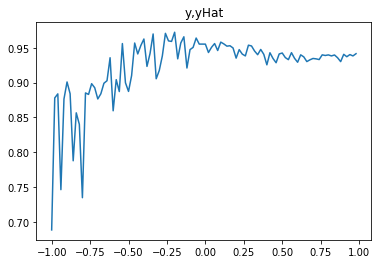

In [10]:
plt.figure()
plt.plot(y,l)
plt.title("y,yHat")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
plt.show()